In [4]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

 97% 101M/105M [00:03<00:00, 38.3MB/s] 
100% 105M/105M [00:03<00:00, 33.3MB/s]


In [1]:
!mkdir -p ~/ .kaggle
!cp -r kaggle.json ~/ .kaggle/
!chmod 600 ~/ .kaggle/kaggle.json

In [3]:
!mv .kaggle /root/

In [5]:
import tensorflow as tf
import os

In [6]:
import zipfile

zip_file_path = '/content/cifake-real-and-ai-generated-synthetic-images.zip'

extract_path = '/content/cifake-real-and-ai-generated-synthetic-images'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to {extract_path}")


Files extracted to /content/cifake-real-and-ai-generated-synthetic-images


In [ ]:
os.listdir('/content/cifake-real-and-ai-generated-synthetic-images/train/REAL')

In [8]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [22]:
data = tf.keras.utils.image_dataset_from_directory('/content/cifake-real-and-ai-generated-synthetic-images/train', image_size=(128, 128))

Found 100000 files belonging to 2 classes.


In [ ]:
for batch in data:
    images, labels = batch

    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels)

In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

In [25]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

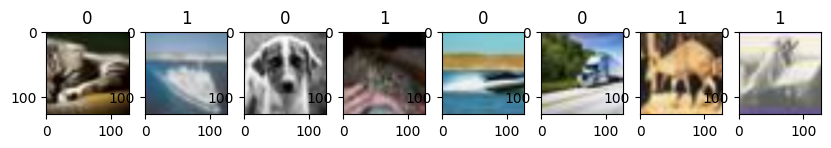

In [26]:
fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [27]:
data = data.map(lambda x, y : (x/255, y))

In [30]:
scaled_it = data.as_numpy_iterator()

In [31]:
batch = scaled_it.next()

In [33]:
train_size = int(len(data)*0.7)
cv_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [34]:
train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size+cv_size).take(test_size)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [68]:
model = Sequential()

In [69]:
model.add(Conv2D(16, (4, 4), 1, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [70]:
model.compile('adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [71]:
hist = model.fit(train, epochs=5, validation_data=cv)

Epoch 1/5
2187/2187 [==============================] - 75s 34ms/step - loss: 0.3732 - accuracy: 0.8314 - val_loss: 0.2721 - val_accuracy: 0.8895
Epoch 2/5
2187/2187 [==============================] - 52s 24ms/step - loss: 0.2298 - accuracy: 0.9077 - val_loss: 0.2188 - val_accuracy: 0.9114
Epoch 3/5
2187/2187 [==============================] - 52s 24ms/step - loss: 0.1894 - accuracy: 0.9242 - val_loss: 0.1959 - val_accuracy: 0.9216
Epoch 4/5
2187/2187 [==============================] - 52s 24ms/step - loss: 0.1666 - accuracy: 0.9338 - val_loss: 0.2048 - val_accuracy: 0.9197
Epoch 5/5
2187/2187 [==============================] - 72s 33ms/step - loss: 0.1434 - accuracy: 0.9440 - val_loss: 0.1825 - val_accuracy: 0.9283


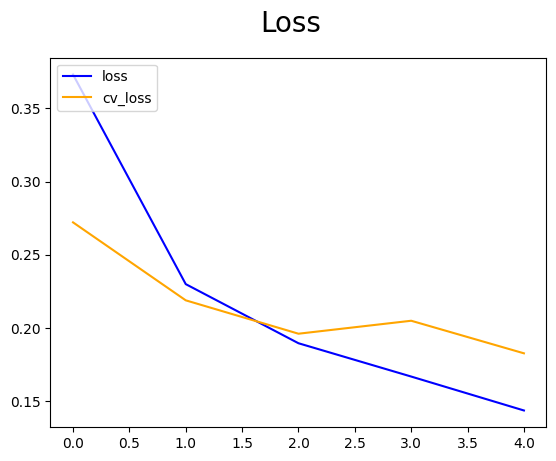

In [72]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

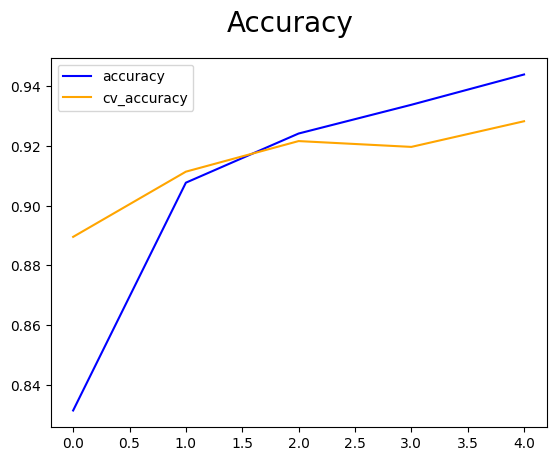

In [73]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [74]:
model.save('real-fake1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [76]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

In [78]:
from tensorflow.keras.models import load_model

In [79]:
model = load_model('/content/real-fake1.h5')

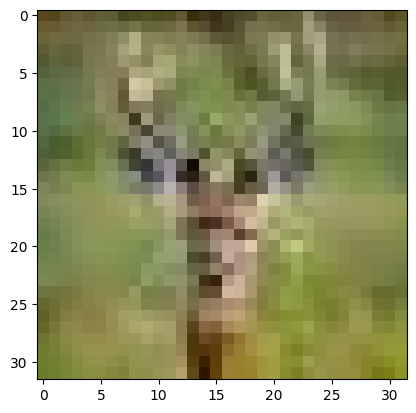

In [80]:
img = cv2.imread('/content/cifake-real-and-ai-generated-synthetic-images/test/FAKE/456 (5).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
os.listdir('/content/cifake-real-and-ai-generated-synthetic-images/test/FAKE')

In [81]:
resize = tf.image.resize(img, (128, 128))

In [82]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 162ms/step


In [83]:
y_pred

array([[0.7725558 , 0.11310796]], dtype=float32)